#Python Module Final Project - World Cup Analysis

## Requirements


* Read File : world_cup.csv
* How many World Cups do we have information of?
* Obtain the full name of the World Cups
* Obtain the list of Host Countries that won the World Cup
* Obtain the list of World Cups with most goals
* Obtain the list of Average Goals per game for each World Cup
* Make a Graph showing the total goals per World Cup



In [1]:
''' Importing Libraries '''
import numpy as np
import pandas as pd
import os

In [2]:
''' Sync Drive '''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
''' Directory Navigation '''
os.listdir('/content/drive/MyDrive/datapath_pythonmodule_finalproject_worldcup')

['world_cups2.csv',
 'world_cups.xlsx',
 'datapath_pythonmodule_finalproject_worldcup.ipynb']

In [4]:
''' Import CSV File for DataFrames usage'''
url = '/content/drive/MyDrive/datapath_pythonmodule_finalproject_worldcup/world_cups2.csv'

In [5]:
''' Read Excel File as DataFrame'''
df_worldcup = pd.read_csv(url)

In [6]:
#df_worldcup
df_worldcup.head(2)
#This turns out to be a 21x10 Table -- Headers included

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [8]:
#Checking DataFrame Column DataTypes
df_worldcup.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

###Question 1: How many World Cups do we have information of?


In [9]:
df_uniqueyears = pd.unique(df_worldcup['Year'])
df_uniqueyears


array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014])

In [10]:
df_uniquecount = len(df_uniqueyears)
df_uniquecount
print(f"There is a total of {df_uniquecount} World Cups in this DataFrame")

There is a total of 20 World Cups in this DataFrame


### Question 2: Obtain the full name of the World Cups

In [11]:
# The Year column is a Int64 Data Type. For it to be concat with the Country Column, it needs to be converted into a String
df_worldcup['Year'] = df_worldcup['Year'].astype(str)
df_worldcup.dtypes

Year              object
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

In [12]:
# We want to insert the World Cup Name Column to the DataFrame
df_worldcup['Name'] = df_worldcup['Year'] + " " + df_worldcup['Country']

In [13]:
df_worldcup.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Name
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1930 Uruguay
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,1934 Italy
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,1938 France


In [14]:
# Using the .pop and .insert functions, we were able to set the Name column as the first column
changecol = df_worldcup.pop('Name')
df_worldcup.insert(0,'Name',changecol)
df_worldcup

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930 Uruguay,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934 Italy,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938 France,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950 Brazil,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954 Switzerland,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958 Sweden,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962 Chile,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966 England,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970 Mexico,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974 Germany,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


### Question 3: Obtain the list of Host Countries that won the World Cup

In [15]:
# Converting DataFrame Series to Lists. The List will be passed to a function for analysis
hostcountries = df_worldcup['Country'].tolist()
#hostcountries
#type(hostcountries)

In [16]:
winnercountry = df_worldcup['Winner'].tolist()
#winnercountry
#type(winnercountry)

In [17]:
yearwon = df_worldcup['Year'].tolist()
#yearwon
#type(yearwon)

In [18]:
fullwinners = []

def worldcupwinners(hostcountries,winnercountry,yearwon):
  # a first checkup is to verify that the list are of the same size
  size1 = len(hostcountries)
  size2 = len(winnercountry)
  size3 = len(yearwon)

  if size1 != size2:
    print(f"The Lists are not of the same size: HostCountries {size1} & WinnerCountry {size2}")
  elif size1 != size3:
    print(f"The lists are not of the same size: HostCountries {size1} & YearWon {size3}")
  #else:
    #print(f"The lists are of the same size: HostCountries {size1} & WinnerCountry {size2}")

  for i in range(size1):
    if hostcountries[i] == winnercountry[i]:
      fullworldcupnamewinner = hostcountries[i] + " " + yearwon[i]
      fullwinners.append(fullworldcupnamewinner)

In [19]:
worldcupwinners(hostcountries,winnercountry,yearwon)
fullwinners

['Uruguay 1930', 'Italy 1934', 'England 1966', 'Argentina 1978', 'France 1998']

Since we are working with DataFrames along with the Pandas Library, we can Query the information using the .Query method that verifies the rows where the Country == Winner.

This is another way of getting kind of the same result. The difference as we can see, we obtain the full table information of the records that meet the condition.

In [20]:
worldwinner = df_worldcup.query('Country == Winner')
worldwinner

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930 Uruguay,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934 Italy,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
7,1966 England,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
10,1978 Argentina,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
15,1998 France,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100


### Question 4: Obtain the list of World Cups with most goals

In [21]:
mostgoals = df_worldcup.sort_values(by='GoalsScored', ascending=False)
mostgoals.head(5)

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
19,2014 Brazil,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
15,1998 France,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002 Korea/Japan,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006 Germany,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
11,1982 Spain,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723


### Question 5: Obtain the list of Average Goals per game for each World Cup

In [22]:
df_worldcup['Goal_Avg_xGame']= round(df_worldcup['GoalsScored'] / df_worldcup['MatchesPlayed'],2)
df_worldcup.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal_Avg_xGame
0,1930 Uruguay,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,3.89
1,1934 Italy,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,4.12
2,1938 France,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4.67
3,1950 Brazil,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,4.00
4,1954 Switzerland,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.38


### Question 6: Make a Graph showing the Total Goals per World Cup


In [23]:
df_worldcup.head()

,Name,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goal_Avg_xGame
0,1930 Uruguay,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,3.89
1,1934 Italy,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,4.12
2,1938 France,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4.67
3,1950 Brazil,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,4.00
4,1954 Switzerland,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.38


In [25]:
# Importing PyPlot Library from Pandas to be able to Graph
import matplotlib.pyplot as plt

In [31]:
df_worldcup.dtypes

Name               object
Year               object
Country            object
Winner             object
Runners-Up         object
Third              object
Fourth             object
GoalsScored         int64
QualifiedTeams      int64
MatchesPlayed       int64
Attendance         object
Goal_Avg_xGame    float64
dtype: object

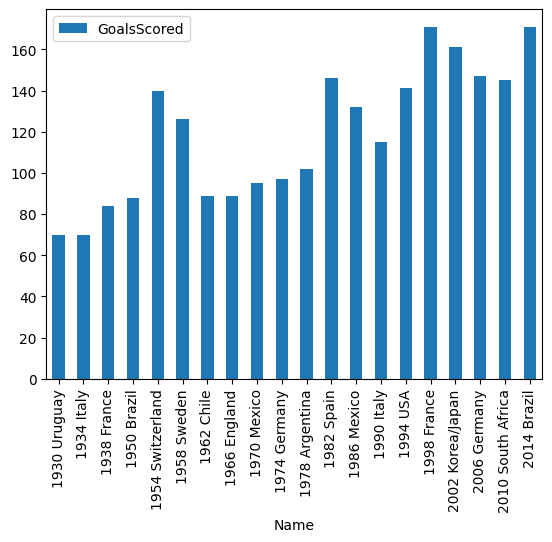

In [32]:
graph = df_worldcup.plot.bar(x='Name', y='GoalsScored')